In [4]:
# Import required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Load the dataset
file_path = "Online retail.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

In [6]:
# Assign column names manually
df.columns = ['Items']

In [7]:
# Display the first few rows to confirm the change
df.head()

,Items
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [8]:
# Calculate the number of items per transaction
df['Num_Items'] = df['Items'].apply(lambda x: len(x.split(',')))

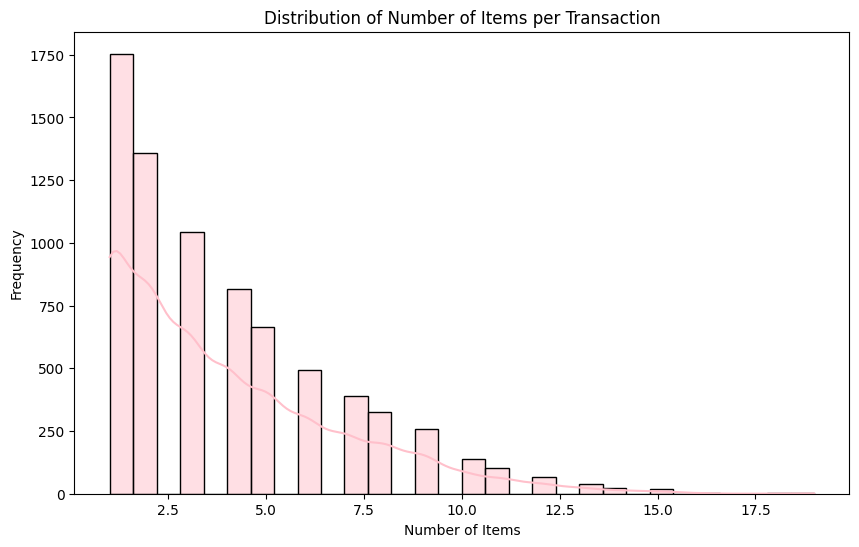

In [9]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Num_Items'], kde=True, bins=30, color='pink')
plt.title('Distribution of Number of Items per Transaction')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Check for missing values
df.isnull().sum()

,0
Items,0
Num_Items,0


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Convert each transaction to a list of items
transactions = df['Items'].apply(lambda x: x.split(',')).tolist()

In [13]:
# Initialize the Transaction Encoder
encoder = TransactionEncoder()

# Transform the data into a one-hot encoded DataFrame
encoded_data = encoder.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.columns_)


In [14]:
frequent_itemsets = apriori(encoded_df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.113816,(burgers)
1,0.103575,(cake)
2,0.054879,(champagne)
3,0.083865,(chicken)
4,0.205217,(chocolate)
5,0.060676,(cookies)
6,0.071884,(cooking oil)
7,0.208116,(eggs)
8,0.083865,(escalope)
9,0.192657,(french fries)


In [15]:
# Calculate the number of itemsets
num_itemsets = len(frequent_itemsets)

In [16]:
# Generate association rules
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(mineral water),0.205217,0.299710,0.073237,0.356874,1.190730,1.0,0.011731,1.088884,0.201538,0.169651,0.081629,0.300616
1,(mineral water),(chocolate),0.299710,0.205217,0.073237,0.244358,1.190730,1.0,0.011731,1.051798,0.228732,0.169651,0.049248,0.300616
2,(chocolate),(spaghetti),0.205217,0.229565,0.055845,0.272128,1.185406,1.0,0.008735,1.058476,0.196793,0.147374,0.055245,0.257697
3,(spaghetti),(chocolate),0.229565,0.205217,0.055845,0.243266,1.185406,1.0,0.008735,1.050280,0.203012,0.147374,0.047873,0.257697
4,(eggs),(mineral water),0.208116,0.299710,0.070145,0.337047,1.124578,1.0,0.007770,1.056320,0.139891,0.160265,0.053317,0.285545
5,(mineral water),(eggs),0.299710,0.208116,0.070145,0.234043,1.124578,1.0,0.007770,1.033849,0.158188,0.160265,0.032740,0.285545
6,(eggs),(spaghetti),0.208116,0.229565,0.051401,0.246982,1.075870,1.0,0.003625,1.023130,0.089053,0.133067,0.022607,0.235444
7,(spaghetti),(eggs),0.229565,0.208116,0.051401,0.223906,1.075870,1.0,0.003625,1.020345,0.091532,0.133067,0.019940,0.235444
8,(frozen vegetables),(mineral water),0.129855,0.299710,0.050435,0.388393,1.295895,1.0,0.011516,1.144999,0.262407,0.133028,0.126637,0.278336
9,(mineral water),(frozen vegetables),0.299710,0.129855,0.050435,0.168279,1.295895,1.0,0.011516,1.046198,0.326054,0.133028,0.044158,0.278336


In [17]:
# Filter rules with high confidence and lift
strong_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 2)]
strong_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


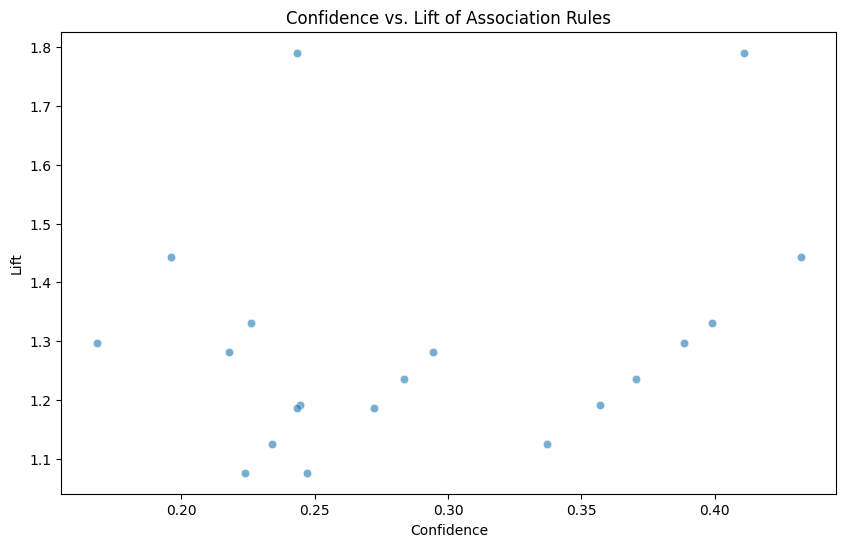

In [18]:
# Scatter plot of confidence vs. lift
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='confidence', y='lift', alpha=0.6)
plt.title('Confidence vs. Lift of Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

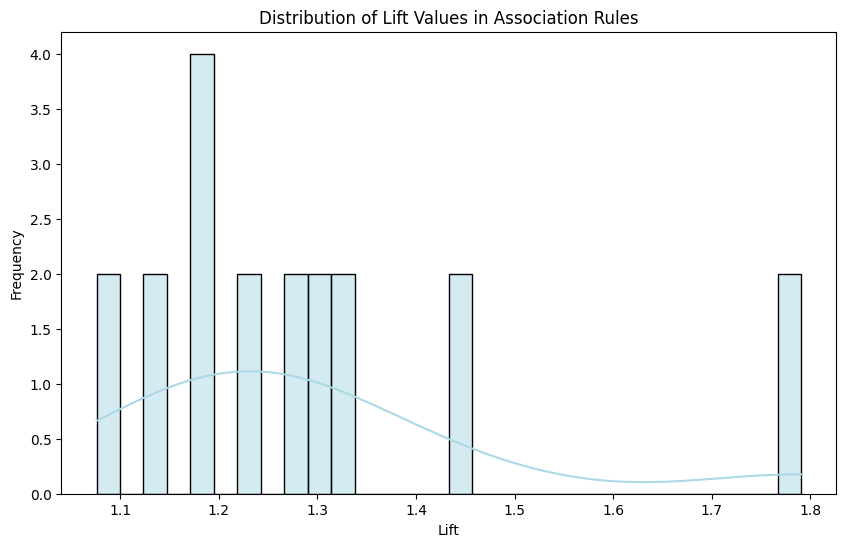

In [19]:
# Histogram of lift values
plt.figure(figsize=(10, 6))
sns.histplot(rules['lift'], bins=30, kde=True, color='lightblue')
plt.title('Distribution of Lift Values in Association Rules')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()


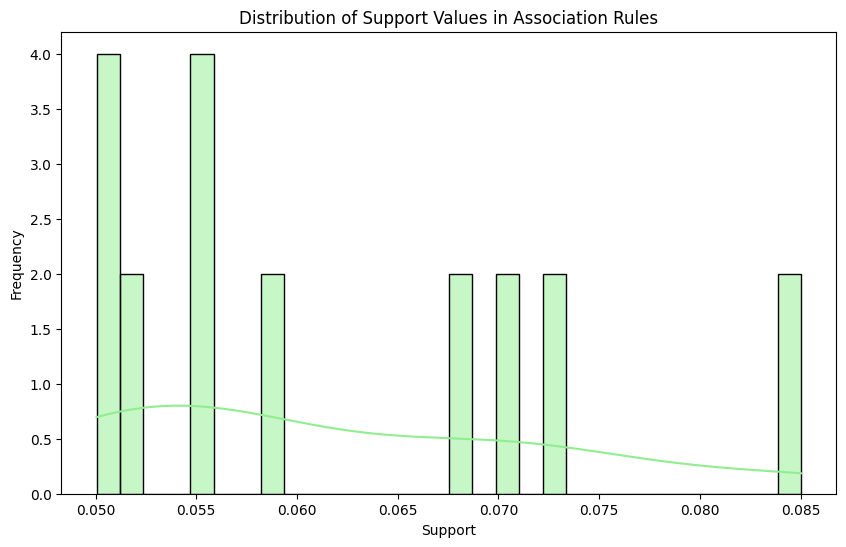

In [20]:
# Histogram of support values
plt.figure(figsize=(10, 6))
sns.histplot(rules['support'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Support Values in Association Rules')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.show()


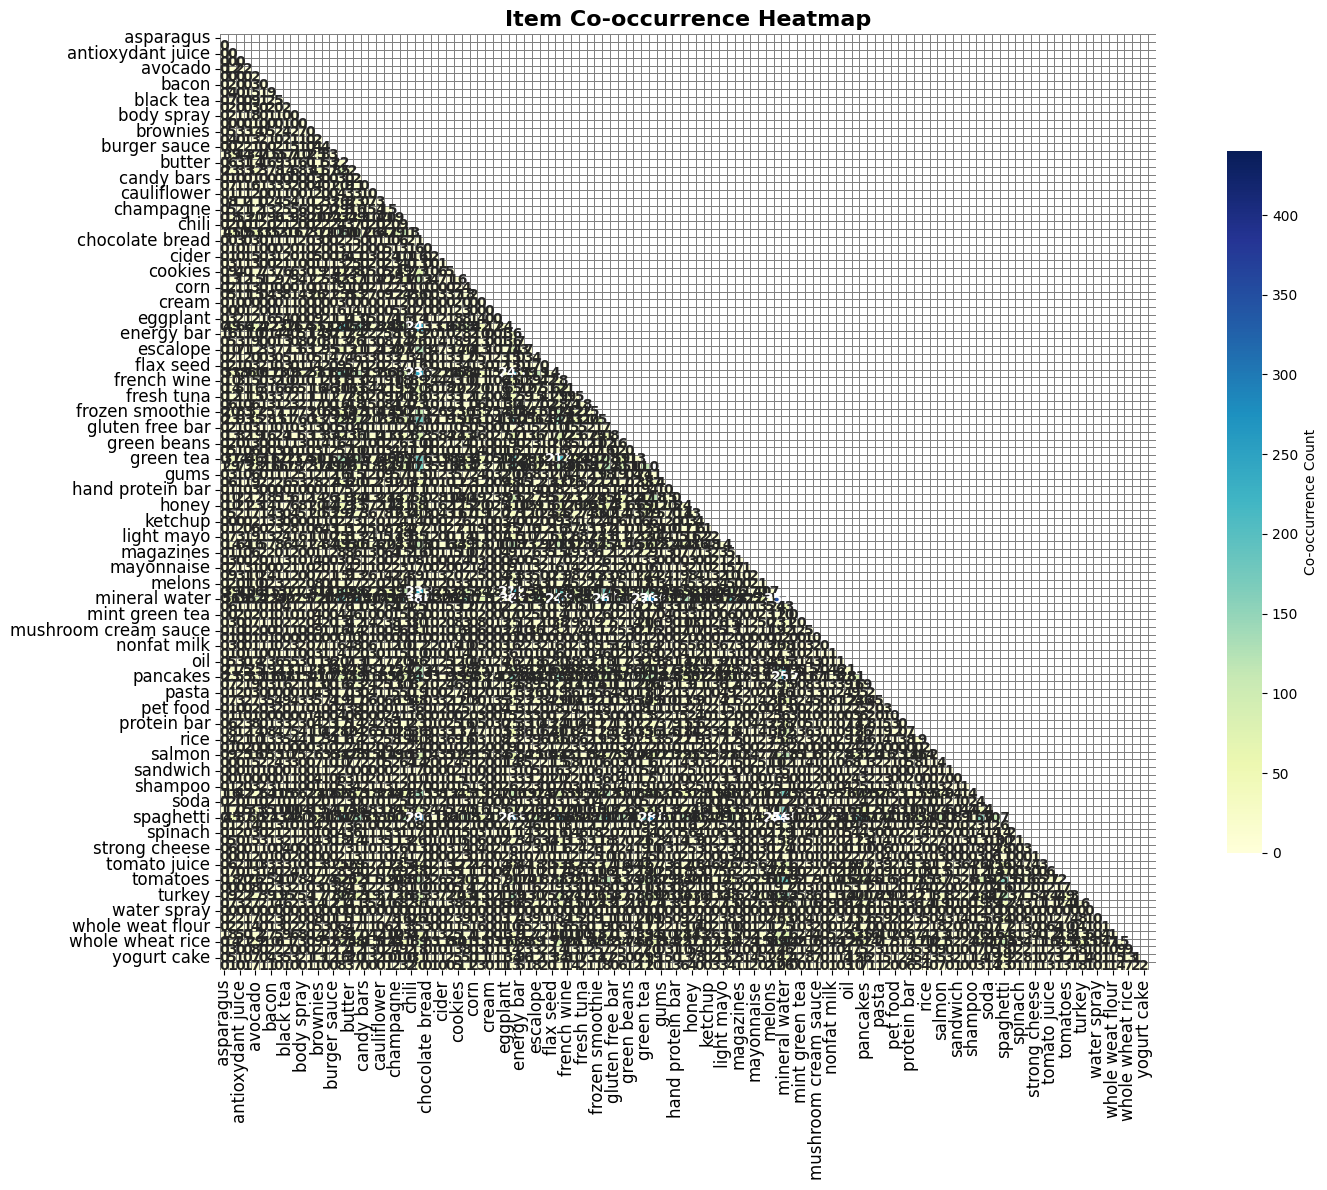

In [21]:
import numpy as np
# Create a co-occurrence matrix for items
co_occurrence = pd.DataFrame(0, index=encoder.columns_, columns=encoder.columns_)

for transaction in transactions:
    for item in transaction:
        for other_item in transaction:
            if item != other_item:
                co_occurrence.at[item, other_item] += 1

# Mask the upper triangle of the matrix (optional, for cleaner visualization)
mask = np.triu(np.ones_like(co_occurrence, dtype=bool))

# Set the plot size
plt.figure(figsize=(16, 12))

# Create the heatmap with improved style
sns.heatmap(co_occurrence,
            cmap='YlGnBu',  # Color palette for better readability
            annot=True,
            fmt='d',  # Integer formatting for annotations
            annot_kws={'size': 10, 'weight': 'bold'},  # Annotation text style
            cbar=True,  # Display color bar
            mask=mask,  # Mask upper triangle to avoid redundant data
            square=True,  # Square plot for better visual appeal
            linewidths=0.5,  # Thin lines between cells
            linecolor='gray',  # Color of grid lines
            cbar_kws={'shrink': 0.75, 'label': 'Co-occurrence Count'},  # Color bar label
            vmin=0, vmax=co_occurrence.values.max())  # Control the color scale

# Rotate item labels for better readability
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Title and labels
plt.title('Item Co-occurrence Heatmap', fontsize=16, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-22-9a9415e95fc3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')


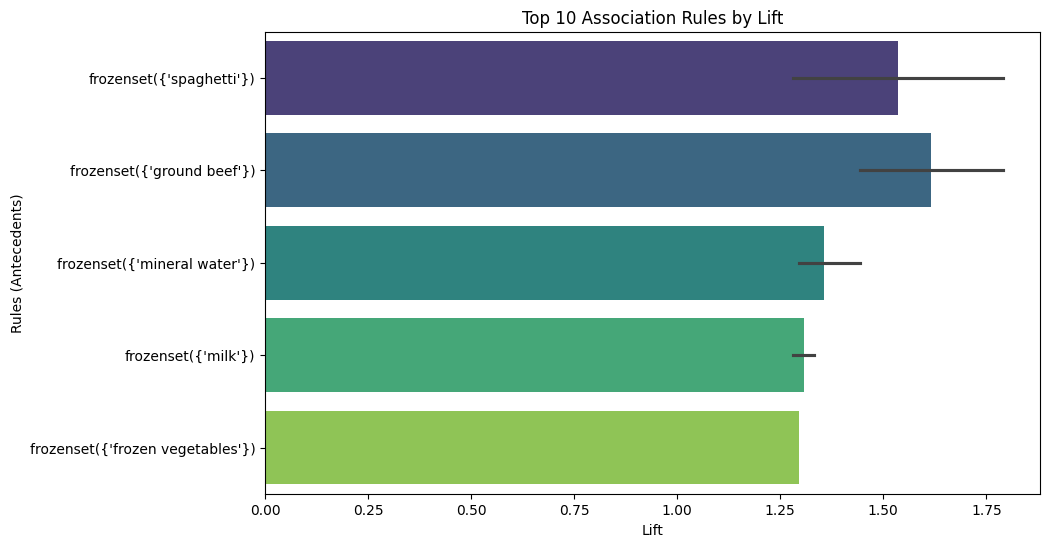

In [22]:
# Top N strongest rules by lift
top_n = 10
top_rules = rules.nlargest(top_n, 'lift')

# Plot the top rules by lift
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')
plt.title(f'Top {top_n} Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules (Antecedents)')
plt.show()


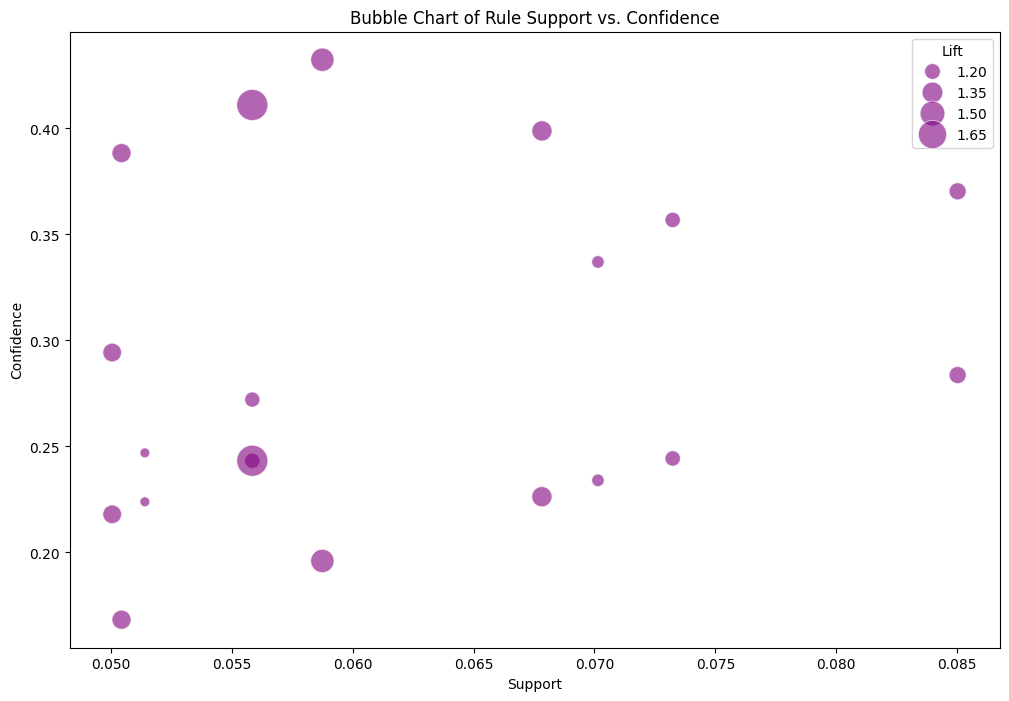

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(50, 500), color='purple', alpha=0.6)
plt.title('Bubble Chart of Rule Support vs. Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

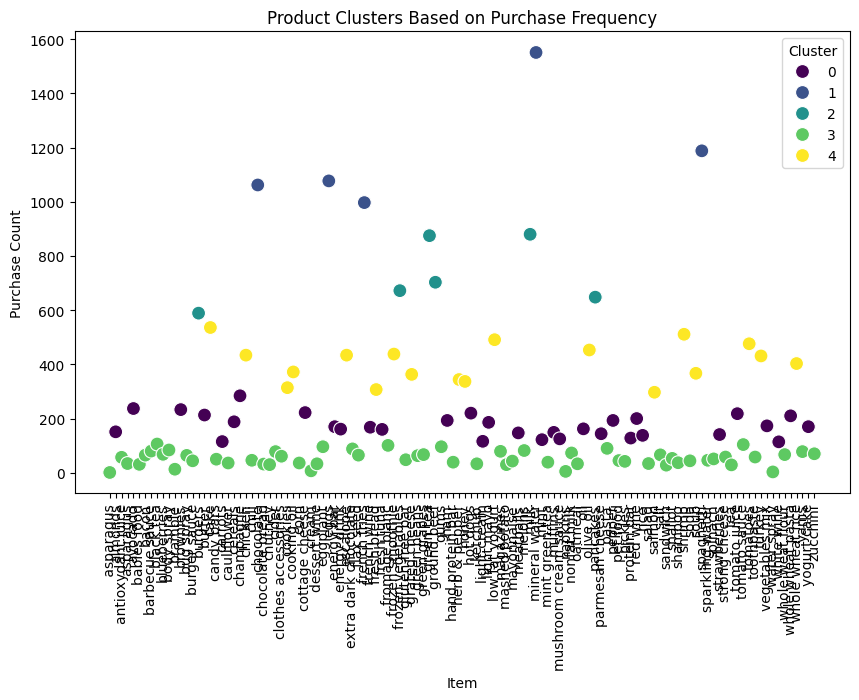

In [24]:
from sklearn.cluster import KMeans

# Create a DataFrame with itemsets (1s and 0s for purchased or not)
kmeans_data = encoded_df.sum(axis=0).to_frame().reset_index()
kmeans_data.columns = ['Item', 'Count']

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_data['Cluster'] = kmeans.fit_predict(kmeans_data[['Count']])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kmeans_data, x='Item', y='Count', hue='Cluster', palette='viridis', s=100)
plt.title('Product Clusters Based on Purchase Frequency')
plt.xlabel('Item')
plt.ylabel('Purchase Count')
plt.xticks(rotation=90)
plt.show()


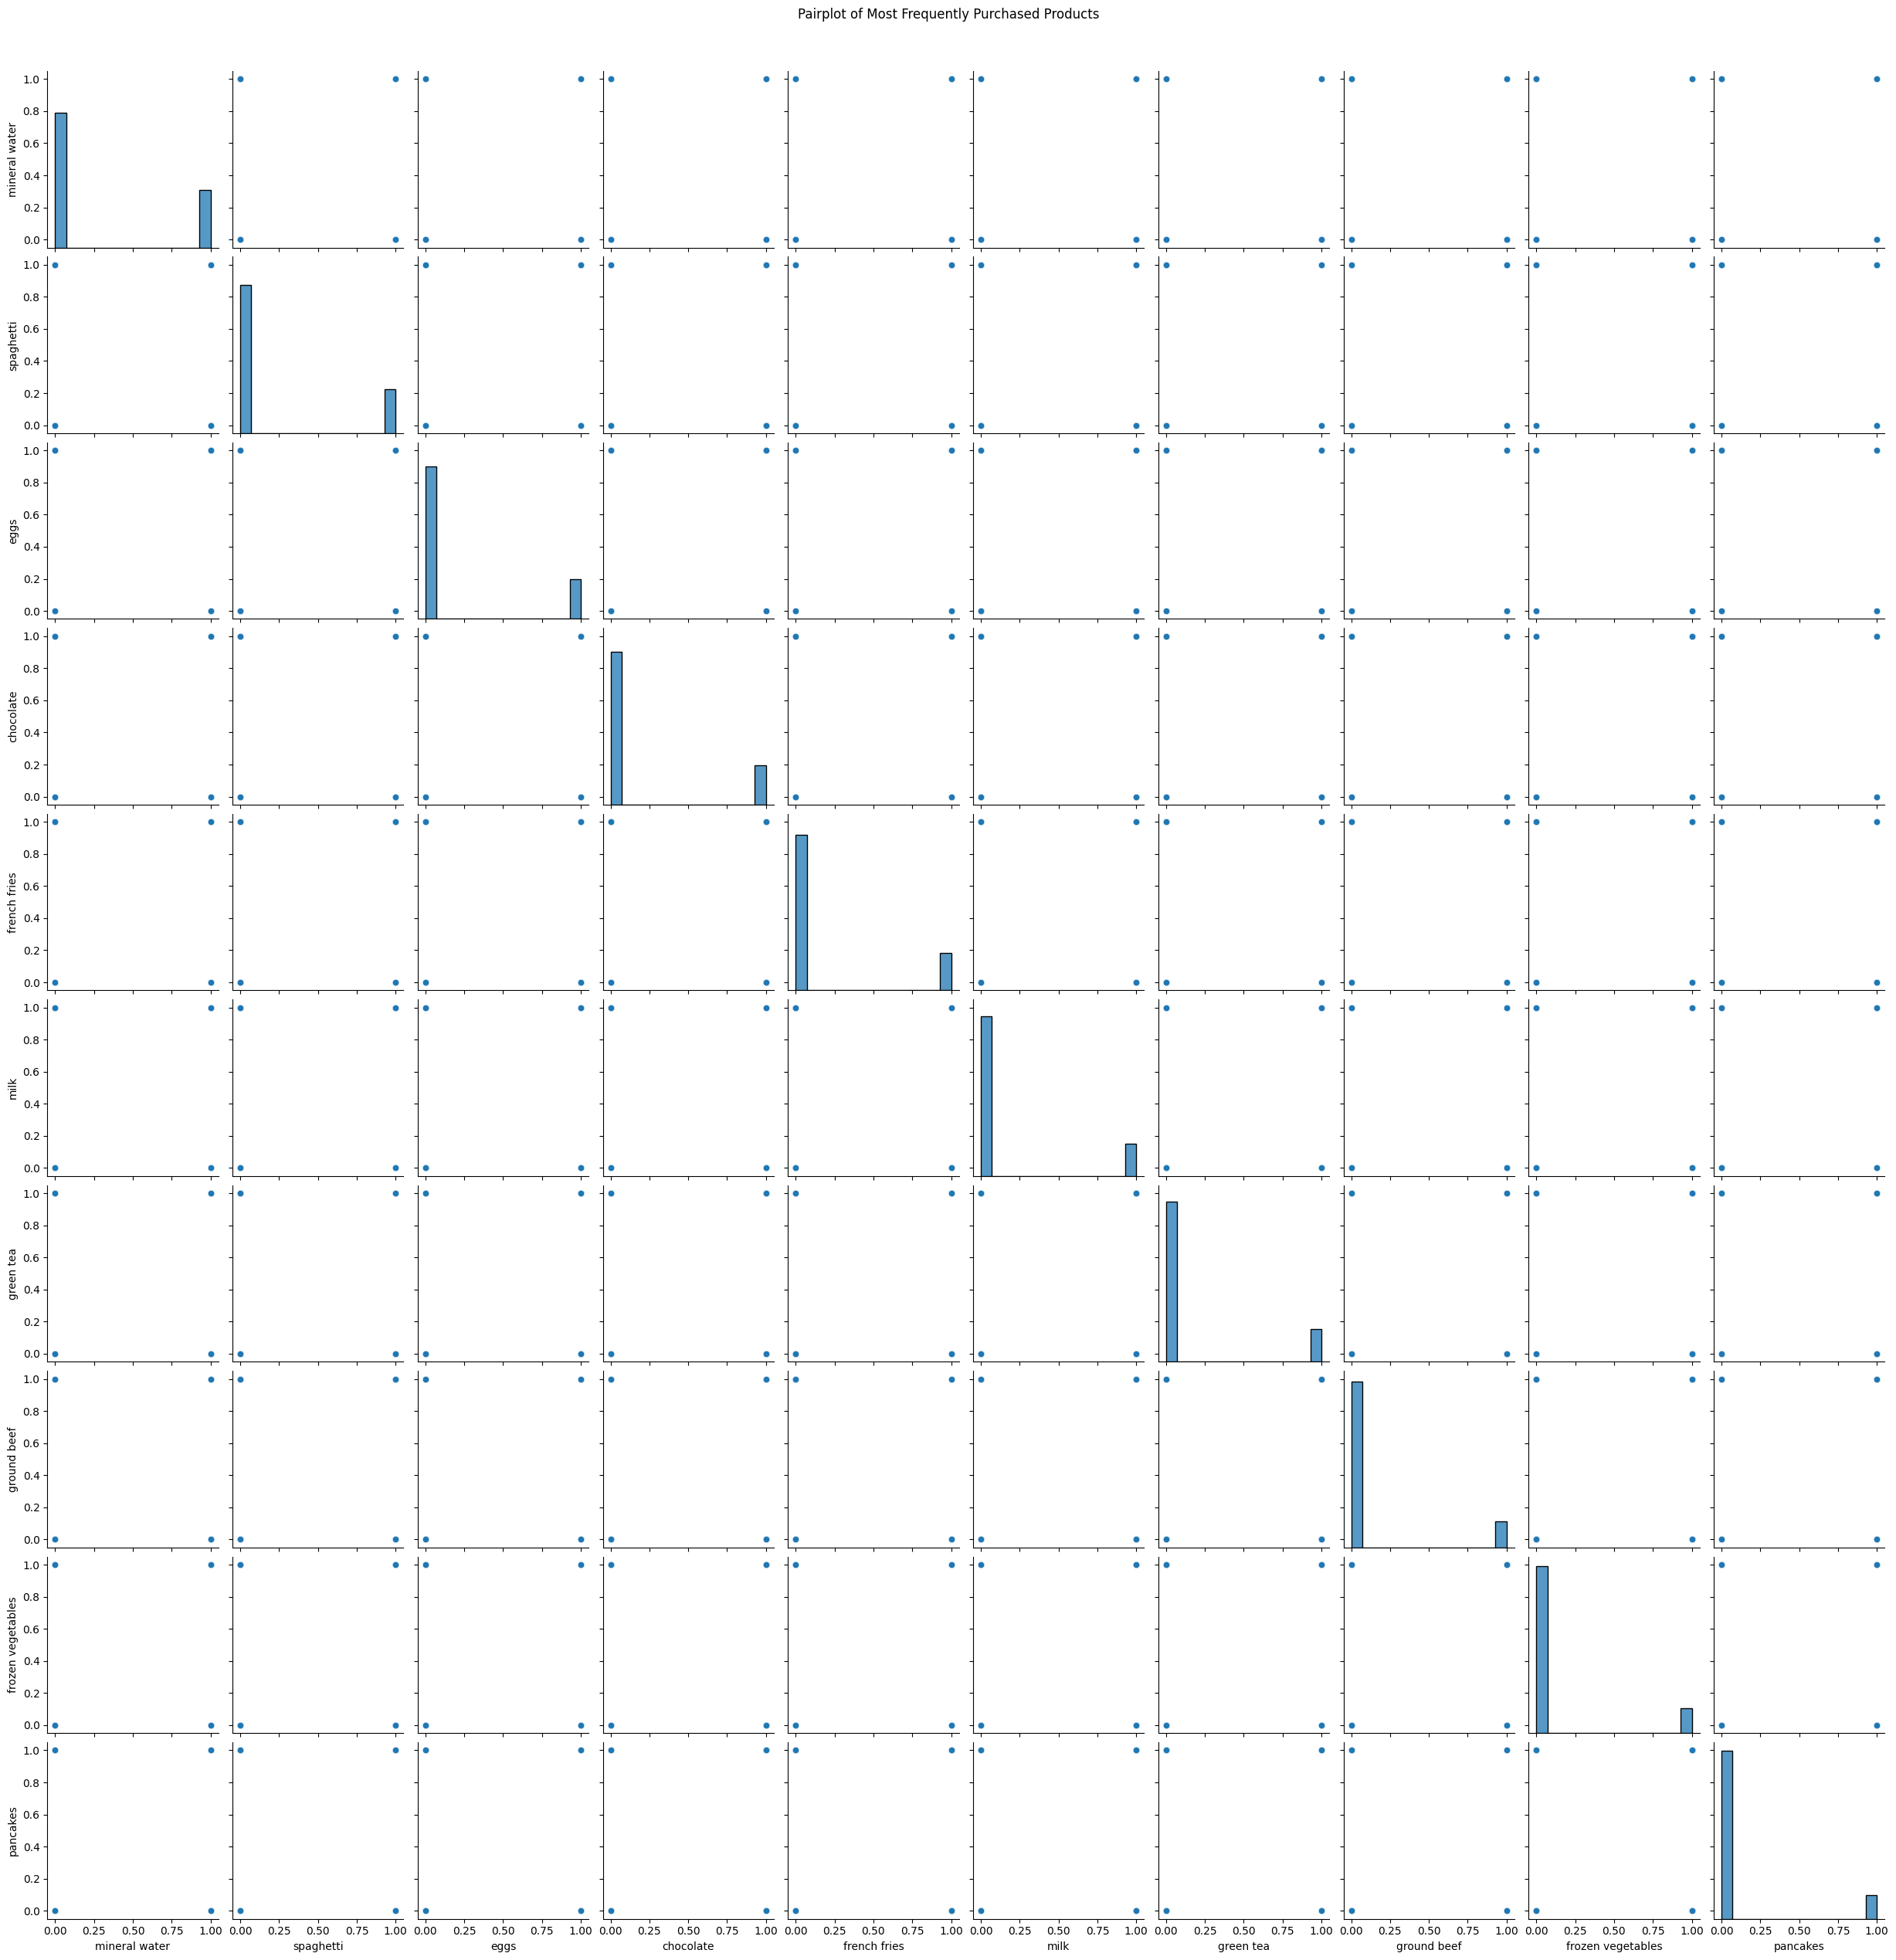

In [25]:
# Select top N items with the highest purchase counts
top_items = encoded_df.sum(axis=0).sort_values(ascending=False).head(10).index

# Subset the dataset for the top N items
subset = encoded_df[top_items]

# Plot pairplot for the subset
sns.pairplot(subset, kind='scatter', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Most Frequently Purchased Products', y=1.02)
plt.show()


Interpreting Association Rules and Customer Purchasing Behavior
Association Rules Overview

Antecedent → Consequent: Items bought together.
Support: Frequency of the combination.
Confidence: Likelihood of buying the consequent after the antecedent.
Lift: Strength of association (lift > 1 indicates a strong relationship).
Key Insights

Popular Product Combinations:

Mineral Water → Chocolate: Lift = 1.19; customers enjoy a treat with a drink.
Spaghetti → Chocolate: Lift = 1.19; meal and dessert pairing.
Ground Beef → Mineral Water: Lift = 1.44; suggests a meal-prep pattern.
Milk → Mineral Water: Lift = 1.33; stocking up on essentials.
Other Notable Combinations:

Spaghetti → Eggs: Lift = 1.08; possible meal-prep items.
Frozen Vegetables → Mineral Water: Lift = 1.30; health-conscious choices.
Business Implications

Product Bundling:

Pair items like mineral water with chocolate or ground beef for meal kits.
Offer spaghetti and eggs as a convenient meal bundle.
Targeted Promotions:

Discounts on complementary items (e.g., chocolate with spaghetti).
Promote bundles like milk and mineral water for “healthy essentials.”
Store Layout:

Place frequently bought-together items near each other (e.g., spaghetti and eggs).
Future Purchase Predictions:

Use patterns to anticipate customer needs and suggest related products.

Conclusion:

Analyzing association rules helps retailers enhance product offerings, store layouts, and promotions. These strategies enable personalized marketing, better cross-selling, and increased sales.

#**INTERVIEW QUESTIONS**

1. What is lift and why is it important in Association rules?

Lift is a metric in association rules that measures the strength of the relationship between two items. It indicates how much more likely the antecedent and consequent are to be bought together compared to if they were independent of each other.

Formula:
Lift = Confidence / Expected Confidence

(Expected Confidence is the probability of the consequent being purchased on its own.)

Importance:

Lift > 1: The items are more likely to be bought together than by chance (positive association).

Lift = 1: No association; the items are independent.

Lift < 1: The items are less likely to be bought together (negative association).

Why It's Important:
Lift helps identify strong, meaningful relationships between products.

Retailers use this to:

Optimize product bundling.

Improve store layouts.

Design targeted promotions for frequently associated items.

2. What is support and Confidence. How do you calculate them?

Support

Definition: The frequency of an itemset in the dataset.
Formula:

Support(A) = Transactions containing (A) / Total transactions

Confidence

Definition: The likelihood that \( B \) occurs given \( A \).
 Formula:

Confidence(A-B) = Support(A U B) / Support(A)

3. What are some limitations or challenges of Association rules mining?

Scalability: Large datasets make computation resource-intensive.

Rare Items: Low-support items may be ignored despite being valuable.

Threshold Selection: Setting support and confidence thresholds is tricky.

Redundant Rules: Many generated rules may be irrelevant or obvious.

No Temporal Context: Fails to capture the order or timing of purchases.

Interpretability: High-confidence rules may not always be meaningful.

External Factors Ignored: Fails to account for external influences like seasonality.